### One dimension
Suppose we seek the root of a function $f(x)$. We take an initial guess $x_0$. If $f(x_0)$ is not close to $0$, then we wish to update our guess $x_0$ to another guess $x_1$ for which we hope $f(x_1)$ is closer to $0$. Certainly, if $f$ is linear, we know exactly how to proceed from $x_0$: the equation for a line through the point $(x_0, f(x_0))$ is 

$$f(x_0) - y = f'(x_0)\cdot (x_0 - x)$$

For this line, we have $y=0$ precisely for the point $x_1$ when $x_0 - x_1 = \frac{f(x_0)}{f'(x_0)}$. In other words, we should update $x_0$ to $x_1$ using the rule 

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$ 

If $f(x_1)$ is not within tolerance to $0$, then we repeat this process to obtain $x_2$, etc. by iterated application of the rule

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

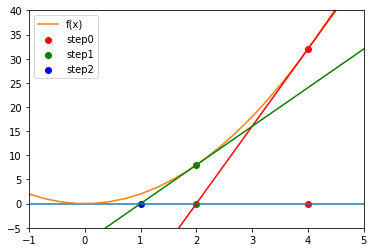

In [1]:
import matplotlib.pyplot as plt
import numpy
import time 

x = numpy.linspace(-7,7,50)
f = numpy.vectorize(lambda x : 2*numpy.power(x,2) )
h = 1e-6
df_at = lambda x : (f(x + h) - f(x - h)) / (2*h)
linear_approx_f_at = lambda x0: numpy.vectorize((lambda x : f(x0) - df_at(x0) * (x0 - x)))

plt.plot(x,0*x)
plt.plot(x,f(x), label = 'f(x)')

color=['red','green','blue','black','purple','teal','magenta']

init_x = 4
steps=2

current_x = init_x
for step in range(steps):
    plt.scatter(current_x,0,label='step'+str(step),color=color[int(step)])
    plt.plot(x,linear_approx_f_at(current_x)(x),color=color[step])
    plt.scatter(current_x,f(current_x),color=color[step])
    current_x -= f(current_x)/df_at(current_x)
plt.scatter(current_x,0,label='step'+str(steps),color=color[steps])
    
plt.legend()
plt.xlim(-1,5)
plt.ylim(-5,40)
plt.show()

In [2]:
def newtonMethod(f, init_x, iters = 10):
    h = 1e-6
    errors = numpy.zeros(iters)
    df = lambda x : (f(x + h) - f(x - h)) / (2*h) # centered finite difference approx for df/dx
    current_x = init_x
    for i in range(int(iters)):
        current_x = current_x - f(current_x) / df(current_x)
        errors[i] = f(current_x)
    print('approx root: '+str(current_x)+'\n'+'error = '+str(f(current_x)))
    return current_x, errors

approx root: 0.626724551447
error = 3.22120463636e-09


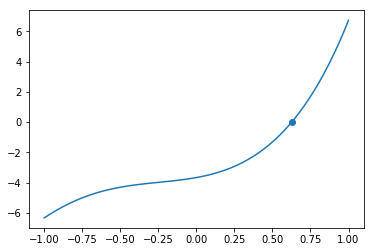

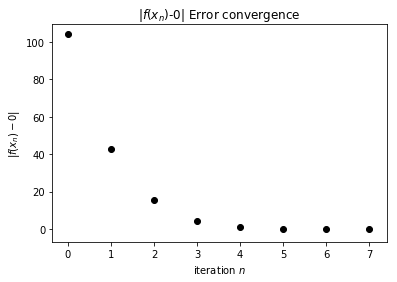

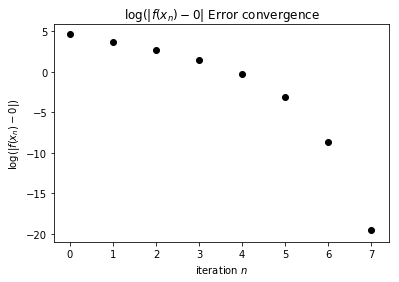

In [3]:
# example

f = lambda x : numpy.exp(numpy.power(x,2)) + 5*numpy.power(x,3) + 5*numpy.sin(x-1.2)
x = numpy.linspace(-1,1,50)
plt.plot(x,numpy.vectorize(f)(x))
result = newtonMethod(f,0,8)
plt.scatter(result[0],0)
plt.show()

for i in range(len(result[1])):
    plt.scatter(i,numpy.abs(result[1][i]),color='black')
plt.title('|$f(x_n)$-0| Error convergence')
plt.xlabel('iteration $n$')
plt.ylabel('$|f(x_n) - 0 |$')
plt.show()

for i in range(len(result[1])):
    plt.scatter(i,numpy.log(numpy.abs(result[1][i])),color='black')
plt.title('$\log(|f(x_n)-0|$ Error convergence')
plt.xlabel('iteration $n$')
plt.ylabel('$\log(|f(x_n) - 0 |)$')
plt.show()

### Application to optimization in one dimension
At an extremum $x_0$ of $f$, we have $f'(x_0)=0$. Newton's method can then be applied to seek to the roots of $f'$. Thus, our iteration scheme is:
$$ x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}$$

### Higher dimensions
For a function $f:\mathbb{R}^m \rightarrow \mathbb{R}^n$, we can apply the same principle by using the linear approximate

$$ (y - f(x_0)) = \left.Df \right|_{x_0} \cdot (x - x_0)$$

at the point $(x_0, f(x_0))$. Hence, the point $x_1$ for which $y=0$ satisfies $x_1 - x_0  = -(\left.Df\right|_{x_0})^{-1} f(x_0)$. Thus, $x_1 = x_0 -(Df |_{x_0})^{-1} f(x_0)$ and the general iteration rule is

$$x_{n+1} = x_n -(\left.Df\right|_{x_n})^{-1} f(x_n)$$

### Application to optimization in higher dimensions
At an extremum $x_0$ of $f\in \mathcal{C}^2(\mathbb{R}^m,\mathbb{R}^n)$, we have $Df|_{x_0} = 0 \in \mathbb{R}^n$. THe iteration scheme is

$$ x_{n+1} = x_n - (\left.Hf\right|_{x_n})^{-1} \cdot \left.Df\right|_{x_n}$$
